In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
datos = pd.read_csv("/content/drive/My Drive/Entrenamieto_ECI_2020.csv")

In [7]:
datos["Bureaucratic_Code"]

0        Bureaucratic_Code_4
1        Bureaucratic_Code_4
2        Bureaucratic_Code_4
3        Bureaucratic_Code_5
4        Bureaucratic_Code_5
                ...         
16942    Bureaucratic_Code_4
16943    Bureaucratic_Code_4
16944    Bureaucratic_Code_4
16945    Bureaucratic_Code_4
16946    Bureaucratic_Code_4
Name: Bureaucratic_Code, Length: 16947, dtype: object

In [8]:
datos["Bureaucratic_Code"].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [58]:
datos["Stage_int"] = (datos["Stage"] == "Closed Won").astype(int)
porcentaje_por_codigo = datos.loc[(datos["Bureaucratic_Code"] != "Bureaucratic_Code_6") & (datos["Bureaucratic_Code"] != "Bureaucratic_Code_3")] #Ya que estarian sesgando los datos por ser poco ocurrentes
porcentaje_por_codigo = porcentaje_por_codigo.groupby("Bureaucratic_Code").agg({"Stage_int" : "mean"})
porcentaje_por_codigo.columns = ["Porcentaje por codigo"]

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

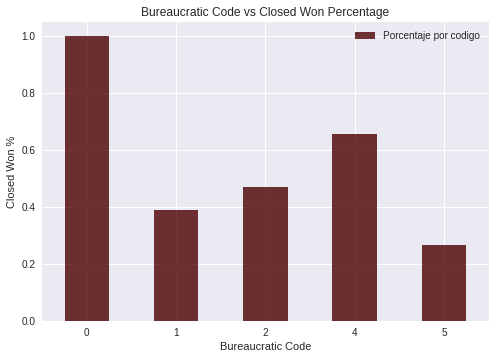

In [61]:
porcentaje_por_codigo.plot(kind = "bar",color = (0.3,0,0,0.8))
plt.title("Bureaucratic Code vs Closed Won Percentage")
style.use("seaborn")
plt.xlabel("Bureaucratic Code")
plt.ylabel("Closed Won %")
plt.xticks(np.arange(5),[0,1,2,4,5])
plt.xticks(rotation = 0)
plt.show()